In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
trained_model = tf.keras.applications.InceptionV3(input_shape = (224, 224, 3),include_top=False, weights='imagenet')

In [3]:
trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [4]:
for layer in trained_model.layers:
  layer.trainable = False

last_layer = trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [5]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [6]:
import os
base=r'C:\Users\BIJAY KUMAR MOHANTY\Documents\Face-Mask-Detection\dataset'
a=os.path.join(base, 'face-mask')
b=os.path.join(a, 'Train')
Train_Mirror=os.path.join(b, 'with_mask')
c=os.listdir( Train_Mirror )
Train_NoMirror=os.path.join(b, 'without_mask')
d=os.listdir( Train_NoMirror )

p=os.path.join(base, 'face-mask')
q=os.path.join(p, 'Test')
Test_Mirror=os.path.join(q, 'with_mask')
r=os.listdir( Test_Mirror )

Test_NoMirror=os.path.join(q, 'without_mask')
s=os.listdir( Test_NoMirror )

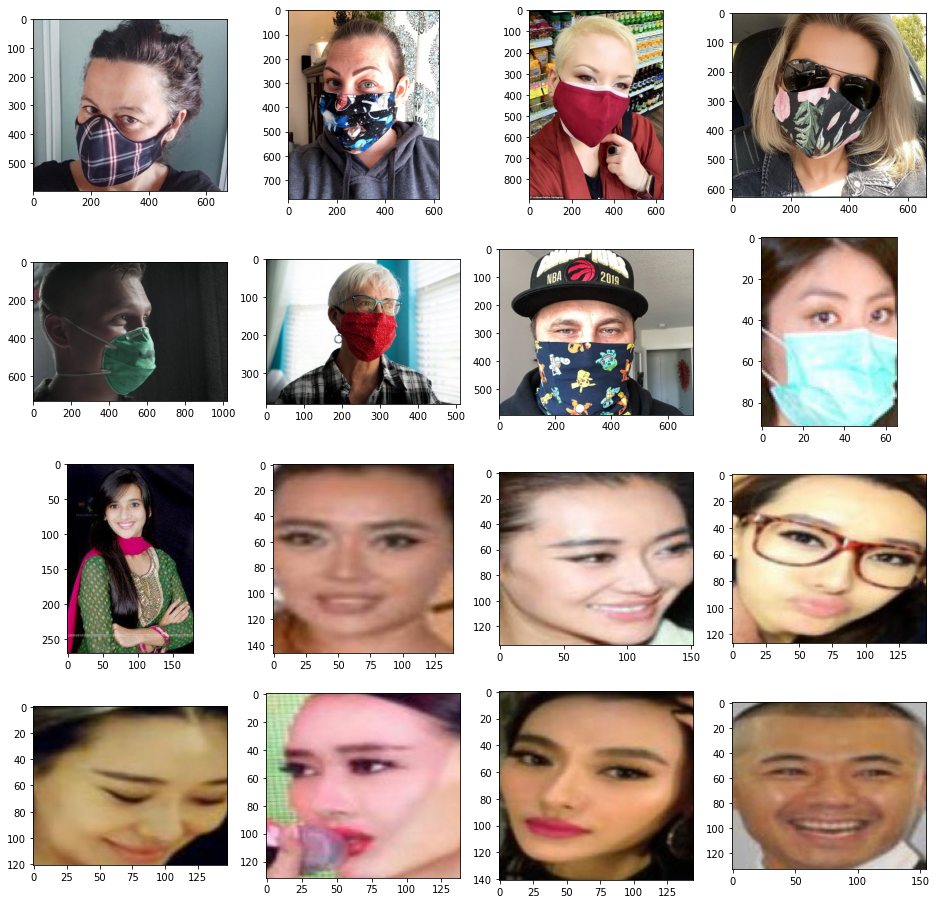

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_train_mirror_pix = [os.path.join(Train_Mirror, fname) 
                for fname in c[ pic_index-8:pic_index] 
               ]

next_train_No_mirror_pix = [os.path.join(Train_NoMirror, fname) 
                for fname in d[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_train_mirror_pix+next_train_No_mirror_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest' )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(b,
                                                    batch_size=64,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     

validation_generator =  test_datagen.flow_from_directory(q,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))

Found 4092 images belonging to 2 classes.
Found 4092 images belonging to 2 classes.


In [9]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=12,
                              epochs=5,
                              validation_steps=9,
                              verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12 steps, validate for 9 steps
Epoch 1/5
12/12 [==============================] - 266s 22s/step - loss: 0.9517 - accuracy: 0.6823 - val_loss: 0.3730 - val_accuracy: 0.7944
Epoch 2/5
 8/12 [===================>..........] - ETA: 1:02 - loss: 0.1975 - accuracy: 0.9316

C:\Users\BIJAY KUMAR MOHANTY\anaconda3\envs\py3-TF2.0\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12/12 [==============================] - 183s 15s/step - loss: 0.2886 - accuracy: 0.8932 - val_loss: 0.1252 - val_accuracy: 0.9667
Epoch 3/5
12/12 [==============================] - 150s 12s/step - loss: 0.2024 - accuracy: 0.9258 - val_loss: 0.1934 - val_accuracy: 0.9167
Epoch 4/5
12/12 [==============================] - 153s 13s/step - loss: 0.1266 - accuracy: 0.9531 - val_loss: 0.1273 - val_accuracy: 0.9556
Epoch 5/5
12/12 [==============================] - 150s 12s/step - loss: 0.2367 - accuracy: 0.9010 - val_loss: 0.1091 - val_accuracy: 0.9667


Text(0.5, 1.0, 'Training and validation loss')

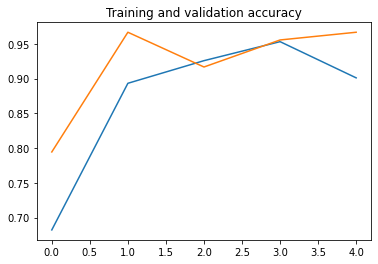

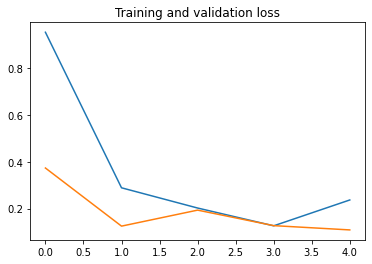

In [10]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [11]:
model.save("mask_detector.h5")